In [66]:
import warnings
warnings.filterwarnings('ignore')
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import gsd.hoomd
from flowermd.base import Pack, Simulation
from flowermd.library import KremerGrestBeadSpring, LJChain
from flowermd.utils import get_target_box_number_density
import unyt as u
import hoomd

cpu = hoomd.device.CPU()

In [51]:
import mbuild as mb
mollengths = [15]

In [80]:
mollengths = [50,100,150]
chains = [16,20,20]
seed = [23,56,75,483]
for j in range(len(seed)):
    for i in range(len(mollengths)):
        ff = KremerGrestBeadSpring(bond_k=100,bond_max=1.15,sigma=1.0)
        gsd_path=(str(seed[j])+"_"+str(mollengths[i])+'kg-melt.gsd')
        log_path=(str(seed[j])+"_"+str(mollengths[i])+'log.txt')
        cg_sim = Simulation(
            initial_state="init_frame_"+str(mollengths[i])+".gsd",
            forcefield=ff.hoomd_forces,
            gsd_write_freq=int(1e5/10),
            gsd_file_name=gsd_path,
            log_file_name=log_path,
            log_write_freq=int(1e5/10),
            seed=seed[j]
        )
        cg_sim.pickle_forcefield((str(seed[j])+"_"+str(mollengths[i])+"forcefield.pickle"))
        target_box = get_target_box_number_density(density=0.85*u.Unit("nm**-3"),n_beads=mollengths[i]*chains[i])
        print(target_box,cg_sim.dt)
        cg_sim.run_update_volume(final_box_lengths=target_box, kT=1.0, n_steps=1e5,tau_kt=100*cg_sim.dt,period=10,thermalize_particles=True)
        cg_sim.run_NVT(n_steps=1e4, kT=1, tau_kt=0.06)
        cg_sim.flush_writers()
        cg_sim.save_restart_gsd((str(seed[j])+"_"+str(mollengths[i])+"restart.gsd"))

Initializing simulation state from a GSD file.
[9.7999461 9.7999461 9.7999461] nm 0.0001
Step 10000 of 100000; TPS: 15634.01; ETA: 0.1 minutes
Step 20000 of 100000; TPS: 17327.37; ETA: 0.1 minutes
Step 30000 of 100000; TPS: 18158.41; ETA: 0.1 minutes
Step 40000 of 100000; TPS: 18596.78; ETA: 0.1 minutes
Step 50000 of 100000; TPS: 18899.01; ETA: 0.0 minutes
Step 60000 of 100000; TPS: 19119.01; ETA: 0.0 minutes
Step 70000 of 100000; TPS: 19272.15; ETA: 0.0 minutes
Step 80000 of 100000; TPS: 19364.11; ETA: 0.0 minutes
Step 90000 of 100000; TPS: 19368.01; ETA: 0.0 minutes
Step 100000 of 100000; TPS: 19142.32; ETA: 0.0 minutes
Step 9999 of 10000; TPS: 15800.15; ETA: 0.0 minutes
Initializing simulation state from a GSD file.
[13.30057317 13.30057317 13.30057317] nm 0.0001
Step 10000 of 100000; TPS: 6436.4; ETA: 0.2 minutes
Step 20000 of 100000; TPS: 6817.6; ETA: 0.2 minutes
Step 30000 of 100000; TPS: 7021.3; ETA: 0.2 minutes
Step 40000 of 100000; TPS: 7165.54; ETA: 0.1 minutes
Step 50000 of 

In [94]:
import pickle
mollengths = [50,100,150]
chains = [16,20,20]
seed = [23]
for j in range(len(seed)):
    for i in range(len(mollengths)):
        with open((str(seed[j])+"_"+str(mollengths[i])+"forcefield.pickle"), "rb") as f:
            ff = pickle.load(f)
        gsd_path=(str(seed[j])+"_"+str(mollengths[i])+'production.gsd')
        log_path=(str(seed[j])+"_"+str(mollengths[i])+'production.txt')
        cg_sim = Simulation(
            initial_state=(str(seed[j])+"_"+str(mollengths[i])+"restart.gsd"),
            forcefield=ff,
            gsd_write_freq=int(1e5/10),
            gsd_file_name=gsd_path,
            log_file_name=log_path,
            log_write_freq=int(1e5/10),
            seed=seed[j]
        )
        cg_sim.run_NVT(n_steps=1e7, kT=1, tau_kt=0.06)
        cg_sim.flush_writers()
        cg_sim.save_restart_gsd((str(seed[j])+"_"+str(mollengths[i])+"restart.gsd"))


Initializing simulation state from a GSD file.
Step 9999 of 10000000; TPS: 13068.47; ETA: 12.7 minutes
Step 19999 of 10000000; TPS: 14307.83; ETA: 11.6 minutes
Step 29999 of 10000000; TPS: 14651.75; ETA: 11.3 minutes
Step 39999 of 10000000; TPS: 14947.79; ETA: 11.1 minutes
Step 49999 of 10000000; TPS: 15132.76; ETA: 11.0 minutes
Step 59999 of 10000000; TPS: 15257.43; ETA: 10.9 minutes
Step 69999 of 10000000; TPS: 15344.76; ETA: 10.8 minutes
Step 79999 of 10000000; TPS: 15413.38; ETA: 10.7 minutes
Step 89999 of 10000000; TPS: 15467.84; ETA: 10.7 minutes
Step 99999 of 10000000; TPS: 15509.23; ETA: 10.6 minutes
Step 109999 of 10000000; TPS: 15543.59; ETA: 10.6 minutes
Step 119999 of 10000000; TPS: 15572.43; ETA: 10.6 minutes
Step 129999 of 10000000; TPS: 15600.98; ETA: 10.5 minutes
Step 139999 of 10000000; TPS: 15623.44; ETA: 10.5 minutes
Step 149999 of 10000000; TPS: 15643.45; ETA: 10.5 minutes
Step 159999 of 10000000; TPS: 15659.98; ETA: 10.5 minutes
Step 169999 of 10000000; TPS: 15673.

In [106]:
cg_sim.dt

0.0001

In [92]:
from cmeutils.sampling import is_equilibrated

mollengths = [50,100,150]
chains = [16,20,20]
seed = [23]
shrink_cut=2
for j in range(len(seed)):
    for i in range(len(mollengths)):
        log = np.genfromtxt(str(seed[j])+"_"+str(mollengths[i])+'log2.txt', names=True)
        print("seed:",j,"chain length:",i)
        pe = log["mdcomputeThermodynamicQuantitiespotential_energy"]
        # equil: bool (True or False), t0: int (starting data point that you can sample from), neff: number of data points in equilibrated region
        print(pe[shrink_cut:])
        equil, t0, g, neff = is_equilibrated(data=pe[shrink_cut:], threshold_neff=200) 
        if equil:
            print("True")
        else:
            # If it's not equilibrated, job.doc.equilibrated stays false, and the "run-longer" operation in project.py will run next time we submit this job
            print("False")

seed: 0 chain length: 0
[54092.1 54081.  54108.1 54129.  54077.5 54042.3 54066.8 54032.4 53990.9
 54067.4 54035.9 54095.8 54067.8 54065.6 54075.4 54039.3 54027.  54035.3
 54042.4 54084.5 54086.5 54065.3 54097.8 54147.1 54117.8 54084.2 54103.
 54114.8 54087.2 54058.6 54106.6 54000.3 54136.8 54063.2 54058.7 54071.5
 54049.4 54024.1 54054.4 54076.2 54054.2 54086.2 54065.  54084.4 54085.3
 54077.7 54069.1 54059.  54090.5 54064.8 54093.  54118.3 54074.6 54082.1
 54052.2 54148.5 54070.8 54085.3 54121.6 54078.7 54112.1 54111.2 54072.7
 54124.3 54121.9 54097.9 54126.  54083.  54078.  54103.1 54108.5 54094.5
 54071.7 54021.  54047.3 54082.5 54092.4 54070.9 54035.9 54109.6 54134.5
 54115.3 54099.9 54083.2 54064.2 54111.2 54148.5 54073.7 54079.  54066.5
 54147.5 54035.1 54128.1 54081.5 54039.  54029.7 54061.2 54053.5 54081.5
 54082.6 54103.  54061.1 54064.2 54115.8 54085.6 54036.1 54062.1 54070.9
 54008.9 54105.  54070.5 54079.2 54073.6 54053.9 54104.2 54054.9 54115.9
 54062.1 54054.2 54098.4 541

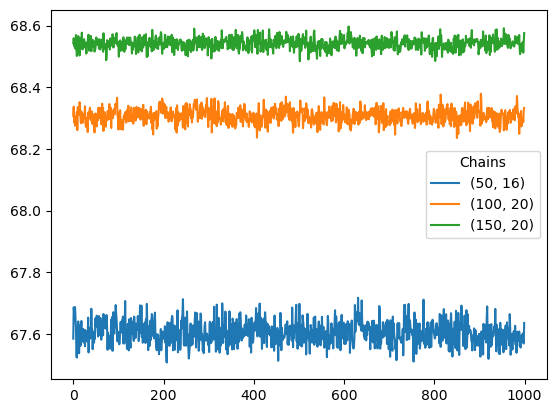

In [101]:
mollengths = [50,100,150]
chains = [16,20,20]
seed = [23]
for j in range(len(seed)):
    for i in range(len(mollengths)):
        log = np.genfromtxt((str(seed[j])+"_"+str(mollengths[i])+'production.txt'), names=True)
        pe = log["mdcomputeThermodynamicQuantitiespotential_energy"]
        plt.plot(pe/(mollengths[i]*chains[i]), label=(mollengths[i],chains[i]))
        plt.legend(title="Chains")

In [104]:
def relabel_center_gsd(file,length,chains, start=0, stop=None, stride=1):
    """
    length = length of molecules
    chains = number of chains in the system
    """
    gsd_file = file
    mid_chunk = np.array(range(length//2 - 2, length//2 + 3))
    all_chain_mid_indices = np.array([mid_chunk + length * i for i in range(chains)])

    original_traj = gsd.hoomd.open(gsd_file)
    with gsd.hoomd.open((str(length)+"production-center.gsd"), "w") as new_traj:
        for frame in original_traj[start:stop:stride]:
            frame.particles.types.append("B")
            old_ids = np.copy(frame.particles.typeid)
            for chunk in all_chain_mid_indices:
                 old_ids[chunk] = 1
            frame.particles.typeid = old_ids
            new_traj.append(frame)

In [105]:
mollengths = [50,100,150]
chains = [16,20,20]
seed = [23]
for j in range(len(seed)):
    for i in range(len(mollengths)):
        relabel_center_gsd(str(seed[j])+"_"+str(mollengths[i])+'production.gsd',mollengths[i],chains[i])

In [118]:
import numpy as np
from cmeutils.dynamics import msd_from_gsd

def sample(file,length):
    steps_per_frame = int(1e5/10)
    # Update job doc
    ts = 0.0001 * 1e-15
    ts_frame = steps_per_frame * ts

    msd = msd_from_gsd(
            gsdfile=file,
            start=0,
            stop=-1,
            atom_types="B",
            msd_mode="direct"
    )
    msd_results = np.copy(msd.msd)
    time_array = np.arange(0, len(msd.msd), 1) * ts_frame
    np.save(file=(str(length)+"msd_time.npy"), arr=time_array)
    #np.save(file=job.fn(f"msd_data_real_nm_squared.npy"), arr=msd_results)
    np.save(file=(str(length)+"msd_data_reduced.npy"), arr=msd.msd)
    print("Finished.")

In [119]:
mollengths = [50,100,150]
chains = [16,20,20]
seed = [23]
for j in range(len(seed)):
    for i in range(len(mollengths)):
        sample((str(mollengths[i])+"production-center.gsd"),i)

Finished.
Finished.
Finished.


Text(0.5, 1.0, 'MSD of 5 center beads')

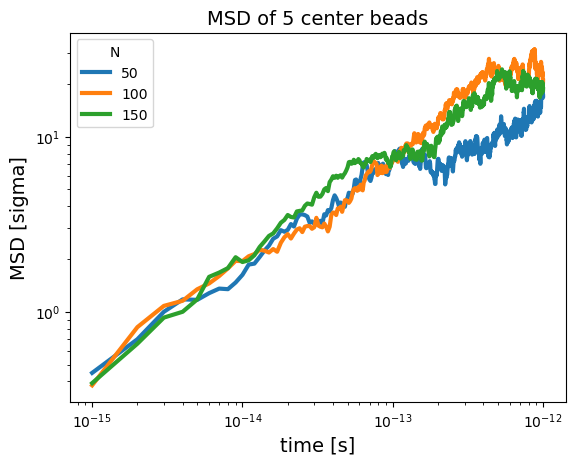

In [130]:
import matplotlib.pyplot as plt
mollengths = [50,100,150]
chains = [16,20,20]
seed = [23]
for j in range(len(seed)):
    for i in range(len(mollengths)):
        time = np.load((str(i)+"msd_time.npy"))
        msd_nm = np.load(str(i)+"msd_data_reduced.npy")
        plt.plot(time[1:], msd_nm[1:], linewidth=3, label=mollengths[i])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("time [s]",fontsize=14)
plt.ylabel("MSD [sigma]",fontsize=14)
plt.legend(title="N")
plt.title("MSD of 5 center beads",fontsize=14)